In [41]:
# Some common packages that we may need
from pandas.plotting import scatter_matrix 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

def load_police_data():
  crimes=pd.read_csv('Crime_Data.csv')
  return crimes

Now that the data is loaded we want to look at the data and see how it is organized and what groups are being used. We can also get some insight onto if the data may be useful adn we can look and see how we may split or encode our data.

In [42]:
crimes = load_police_data()
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24541 entries, 0 to 24540
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RecordID          24541 non-null  int64  
 1   Offense           24541 non-null  object 
 2   IncidentID        24541 non-null  int64  
 3   BlockNumber       23187 non-null  float64
 4   StreetName        24541 non-null  object 
 5   Agency            24541 non-null  object 
 6   DateReported      24541 non-null  object 
 7   HourReported      24541 non-null  int64  
 8   ReportingOfficer  24498 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.7+ MB


In [43]:
crimes.head(10)

,RecordID,Offense,IncidentID,BlockNumber,StreetName,Agency,DateReported,HourReported,ReportingOfficer
0,1,Motor Vehicle Theft,202200030697,800.0,ROCK CREEK RD,CPD,2022/10/24 03:39:36+00,2339,"Bise, Collin"
1,2,Suspicious Activity,202200030687,800.0,RIDGE ST,CPD,2022/10/24 02:52:01+00,2252,"Vlasis, Christopher"
2,3,Larceny - From Motor Vehicle,202200030677,2100.0,JEFFERSON PARK AVE,CPD,2022/10/23 23:02:08+00,1902,"Venereo, Arturo"
3,4,Hit and Run,202200030671,2400.0,FONTAINE AVE,CPD,2022/10/23 21:19:04+00,1719,"Darby, Michael"
4,5,Vandalism,202200030669,100.0,E MAIN ST,CPD,2022/10/23 20:26:09+00,1626,"Whitten, Tobyn"
5,6,Assault Aggravated,202200030660,NaN,4TH ST NW @ PRESTON AVE,CPD,2022/10/23 17:35:08+00,1335,"Hopiane, Sayd"
6,7,Assault Simple,202200030659,1100.0,HARRIS ST,CPD,2022/10/23 16:49:43+00,1249,"Shiflett, Tammy"
7,8,Burglary,202200030655,700.0,PARK ST,CPD,2022/10/23 14:18:45+00,1018,"Shiflett, Tammy"
8,9,Assist Citizen - Mental/TDO/ECO,202200030646,500.0,W US 250-BYPASS,CPD,2022/10/23 08:02:32+00,402,"Wells, Matthew"
9,10,Vandalism,202200030645,1000.0,"ALTAVISTA AVE, A",CPD,2022/10/23 07:25:26+00,325,"Vlasis, Christopher"


In [44]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24541 entries, 0 to 24540
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RecordID          24541 non-null  int64  
 1   Offense           24541 non-null  object 
 2   IncidentID        24541 non-null  int64  
 3   BlockNumber       23187 non-null  float64
 4   StreetName        24541 non-null  object 
 5   Agency            24541 non-null  object 
 6   DateReported      24541 non-null  object 
 7   HourReported      24541 non-null  int64  
 8   ReportingOfficer  24498 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.7+ MB


# Non Numerical Data

Now lets look a little closer at the non numerical data

In [45]:
crimes["Offense"].value_counts()

Hit and Run                         2119
Assault Simple                      1962
Suspicious Activity                 1635
Vandalism                           1605
Larceny - All Other                 1557
                                    ... 
Tactical Crime Initiative - TCI        1
911 Investigation                      1
Prostitution-assisting/promoting       1
Field Interview                        1
Alarm-Accidental                       1
Name: Offense, Length: 119, dtype: int64

In [46]:
crimes["StreetName"].value_counts()

E MARKET ST                1125
EMMET ST N                 1050
W MAIN ST                  1002
E MAIN ST                   523
5TH ST SW                   448
                           ... 
GORDON AVE / 16TH ST NW       1
JEFFERSON PARK AVE, 132       1
JEFFERSON PARK AVE, 25        1
MERCHANT WALK AVE, 300        1
FONTAINE AVE, 104             1
Name: StreetName, Length: 3405, dtype: int64

In [47]:
crimes["Agency"].value_counts()

CPD    24541
Name: Agency, dtype: int64

In [48]:
crimes["DateReported"].value_counts()

2018/06/29 02:20:19+00    6
2018/03/03 18:28:25+00    4
2019/10/07 18:46:09+00    4
2018/06/15 14:08:49+00    4
2020/04/04 01:52:56+00    4
                         ..
2021/04/11 22:13:52+00    1
2021/04/11 23:54:01+00    1
2021/04/12 00:25:04+00    1
2021/04/12 01:43:17+00    1
2017/10/26 04:06:00+00    1
Name: DateReported, Length: 24429, dtype: int64

In [49]:
crimes["ReportingOfficer"].value_counts()

Moje, Ashley        1081
Shiflett, Tammy      614
Stein, Nathan        521
Newton, Arla         469
Pittman, Terry       444
                    ... 
Beasley, Timothy       1
Arnette, Locia         1
Coleman, Ursula        1
Hopkins, Emma          1
Cosgro, Blaine         1
Name: ReportingOfficer, Length: 174, dtype: int64

There are a lot of categories in the non-numerical data. This is not as worrying as it could be since a lot of the data seems like it is unnecessary for our project. It does not seem like we are going to need Reporting Officer, Agency, and Date Reported. We can just use the hours integer to get the time. 

Small side note: It would be interesting to look up odds of getting arrested on certain streets depending on who is on duty, but that is outside of the scope of our particular project. 

# Numerical Data

Now we will look at histograms of the numerical data below. From this data we will determine what is important information and what is not. 

array([[<AxesSubplot:title={'center':'RecordID'}>,
        <AxesSubplot:title={'center':'IncidentID'}>],
       [<AxesSubplot:title={'center':'BlockNumber'}>,
        <AxesSubplot:title={'center':'HourReported'}>]], dtype=object)

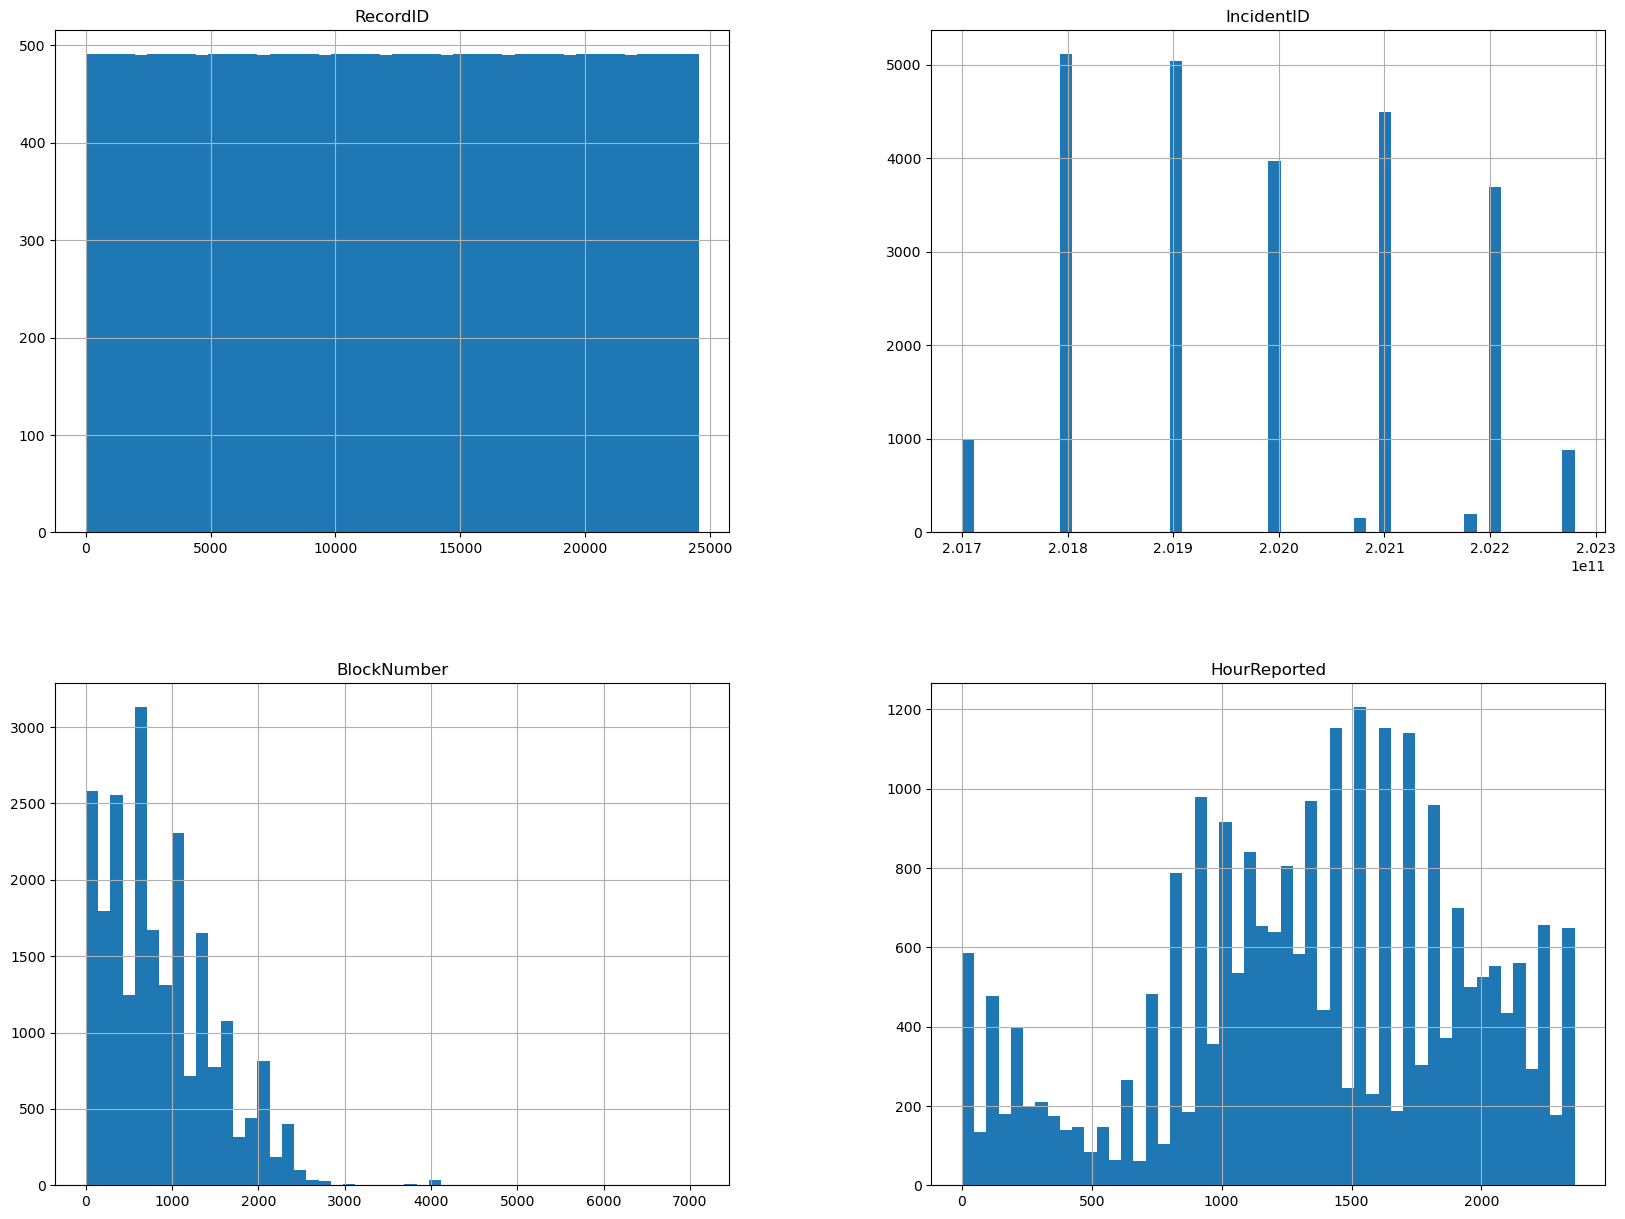

In [50]:
crimes.hist(bins=50, figsize=(20,15))

The histrogram of the Record ID behaved exactly as expected. We assumed that Incident ID would also not be very useful but it is organized by year, which will not really fit into what we are doing for this part of the project, but it would be interesting to look at what crimes have become less frequent over time, and it may actually play a role so even though we initially plan on getting rid of it, we will reevaluate as we continue to work on the project. 
There are some correlations with lower block numbers having more incidents which we did not suspect as a group but more incidents at later hours was something we expeted but there is some strange behavior where it rises and falls from hour to hour which we did not suspect. 

# Null Data




First we will observe the null data and think of a plan to deal with it.

In [51]:
incomplete_data = crimes[crimes.isnull().any(axis=1)].head()
incomplete_data

,RecordID,Offense,IncidentID,BlockNumber,StreetName,Agency,DateReported,HourReported,ReportingOfficer
5,6,Assault Aggravated,202200030660,NaN,4TH ST NW @ PRESTON AVE,CPD,2022/10/23 17:35:08+00,1335,"Hopiane, Sayd"
23,24,Hit and Run,202200030487,NaN,10TH ST NW / W MAIN ST,CPD,2022/10/21 19:42:39+00,1542,"Darby, Michael"
28,29,Larceny - Of Veh Parts/Access,202280000916,NaN,"1029 PRESTON AVENUE AVE, A",CPD,2022/10/21 14:10:02+00,1010,"Moje, Ashley"
41,42,Hit and Run,202200030353,NaN,ELLIOTT AVE / 1ST ST S,CPD,2022/10/20 19:40:20+00,1540,"Lowe, Courtney"
48,49,Fraud-wire fraud,202280000912,NaN,ROSE HILL DR,CPD,2022/10/20 15:33:19+00,1133,"Moje, Ashley"


In [52]:
crimes_without_null = crimes.dropna()
crimes_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23147 entries, 0 to 24540
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RecordID          23147 non-null  int64  
 1   Offense           23147 non-null  object 
 2   IncidentID        23147 non-null  int64  
 3   BlockNumber       23147 non-null  float64
 4   StreetName        23147 non-null  object 
 5   Agency            23147 non-null  object 
 6   DateReported      23147 non-null  object 
 7   HourReported      23147 non-null  int64  
 8   ReportingOfficer  23147 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.8+ MB


In [53]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24541 entries, 0 to 24540
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RecordID          24541 non-null  int64  
 1   Offense           24541 non-null  object 
 2   IncidentID        24541 non-null  int64  
 3   BlockNumber       23187 non-null  float64
 4   StreetName        24541 non-null  object 
 5   Agency            24541 non-null  object 
 6   DateReported      24541 non-null  object 
 7   HourReported      24541 non-null  int64  
 8   ReportingOfficer  24498 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.7+ MB


Looking at the data we see that there are about 1300 missing block numbers, I am not sure how cobining this data with the streetnames is going to work but we will try to use an imputer but it may cause some strange behaviors that will need to be looked at later depending on our observations.

In [54]:
imputer = SimpleImputer(strategy="median", )

Here we are going to look at imputing the data but we decided we would get rid of the values that do not matter first. 

In [55]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24541 entries, 0 to 24540
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RecordID          24541 non-null  int64  
 1   Offense           24541 non-null  object 
 2   IncidentID        24541 non-null  int64  
 3   BlockNumber       23187 non-null  float64
 4   StreetName        24541 non-null  object 
 5   Agency            24541 non-null  object 
 6   DateReported      24541 non-null  object 
 7   HourReported      24541 non-null  int64  
 8   ReportingOfficer  24498 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.7+ MB


In [56]:
crimes = crimes.drop("ReportingOfficer",axis=1)
crimes = crimes.drop("IncidentID", axis=1)
crimes = crimes.drop("Agency", axis=1)
crimes = crimes.drop("RecordID", axis=1)

In [57]:
crime_num = crimes.drop(["Offense", "StreetName"], axis=1)

In [58]:
imputer.fit(crime_num)

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: '2022/10/24 03:39:36+00'

Just want to look at the data in the imputed state

In [ ]:
imputer.statistics_

In [ ]:
crime_num.median().values

Now we need to deal with the categorical data. This is where some big adjustments to what we have inputneed to happen. 

In [ ]:
crime_offense_cat = crimes[["Offense"]]
crime_offense_cat.head(10)

We mostly want assault for our first pass

In [59]:
assaults = crimes[crimes["Offense"].str.contains("Assault")]
assaults

,Offense,BlockNumber,StreetName,DateReported,HourReported
5,Assault Aggravated,NaN,4TH ST NW @ PRESTON AVE,2022/10/23 17:35:08+00,1335
6,Assault Simple,1100.0,HARRIS ST,2022/10/23 16:49:43+00,1249
10,Assault Aggravated,200.0,W MAIN ST,2022/10/23 04:55:05+00,55
12,Assault Intimidation,200.0,E MAIN ST,2022/10/22 19:13:08+00,1513
18,Assault Intimidation,100.0,14TH ST NW,2022/10/22 05:27:31+00,127
...,...,...,...,...,...
24504,Assault Intimidation,100.0,E MARKET ST,2017/10/27 18:39:00+00,1439
24521,Assault Aggravated,100.0,9TH ST NE,2017/10/26 23:03:00+00,1903
24524,Assault Intimidation,1500.0,GROVE RD,2017/10/26 20:23:00+00,1623
24538,Assault Simple,200.0,W WATER ST,2017/10/26 10:52:00+00,652


When are the assaults happening?

In [76]:
assaults.groupby("Offense").median()

,BlockNumber,HourReported
Offense,,
Assault Aggravated,700.0,1354.0
Assault Intimidation,700.0,1453.5
Assault Simple,800.0,1505.5
Sex Offense - Assault w/Object,900.0,1127.0


In [88]:
x = assaults.query('HourReported >= 2000 | HourReported <= 800').count()["Offense"]
print(f"{round(x/assaults.count()['Offense']*100)}% of the assaults happen between 8pm and 8am")

43% of the assaults happen between 8pm and 8am
